In [2]:
import pandas as pd

CSF_DAA_All = pd.read_excel("CSF_DAA_All_PAU_0205.xlsx")
print(CSF_DAA_All.shape)
print(CSF_DAA_All.columns)

Plasma_DAA_All = pd.read_excel("Plasma_DAA_All_0203.xlsx")
print(Plasma_DAA_All.shape)
print(Plasma_DAA_All.columns)

(3622, 18)
Index(['Analytes', 'TargetFullName', 'Target', 'UniProt', 'EntrezGeneID',
       'EntrezGeneSymbol', 'AD_Estimate', 'AD_pvalue', 'AD_FDR', 'PD_Estimate',
       'PD_pvalue', 'PD_FDR', 'FTD_Estimate', 'FTD_pvalue', 'FTD_FDR',
       'DLB_Estimate', 'DLB_pvalue', 'DLB_FDR'],
      dtype='object')
(6607, 18)
Index(['Analytes', 'TargetFullName_y', 'Target_y', 'UniProt_y',
       'EntrezGeneID_y', 'EntrezGeneSymbol_y', 'AD_Estimate', 'AD_pvalue',
       'AD_FDR', 'PD_Estimate', 'PD_pvalue', 'PD_FDR', 'FTD_Estimate',
       'FTD_pvalue', 'FTD_FDR', 'DLB_Estimate', 'DLB_pvalue', 'DLB_FDR'],
      dtype='object')


CSF data shape: 3622
Plasma data shape: 6607


C:\Users\x.ying1\AppData\Local\anaconda3\Lib\site-packages\upsetplot\data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
C:\Users\x.ying1\AppData\Local\anaconda3\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].f

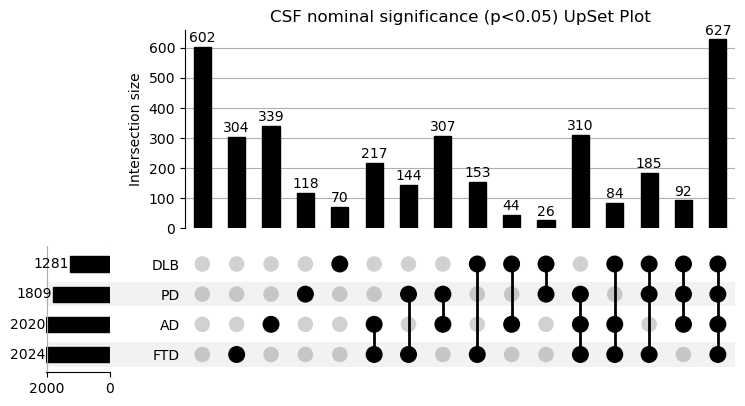

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# ========== 1) Data Loader ==========
CSF_DAA_All = pd.read_excel("CSF_DAA_All_PAU_0205.xlsx")
Plasma_DAA_All = pd.read_excel("Plasma_DAA_All_0203.xlsx")

print("CSF data shape:", CSF_DAA_All.shape[0])
print("Plasma data shape:", Plasma_DAA_All.shape[0])

# ========== 2) Upset plotting function ==========

def plot_upset_for_all_pvalues(df, analyte_col="Analytes", pvalue_suffix="_pvalue", alpha=0.05, title=""):

    pvalue_cols = [col for col in df.columns if col.endswith(pvalue_suffix)]

    for col in pvalue_cols:
        sig_col = col.replace(pvalue_suffix, "_sig")
        df[sig_col] = df[col] < alpha

    memberships = []
    for idx, row in df.iterrows():
        row_members = []
        for col in pvalue_cols:
            sig_col = col.replace(pvalue_suffix, "_sig")
            if row[sig_col]:
                group_name = col.replace(pvalue_suffix, "")
                row_members.append(group_name)
        memberships.append(row_members)
        
    membership_data = from_memberships(memberships)

    upset_obj = UpSet(membership_data, subset_size='count', show_counts=True)
    upset_obj.plot()
    if not title:
        title = "Nominal Significance UpSet (p < {alpha})".format(alpha=alpha)
    plt.title(title)
    plt.show()

# ========== 3) Plotting ==========
plot_upset_for_all_pvalues(
    CSF_DAA_All, 
    analyte_col="Analytes", 
    pvalue_suffix="_pvalue", 
    alpha=0.05, 
    title="CSF nominal significance (p<0.05) UpSet Plot"
)

# plot_upset_for_all_pvalues(
#     Plasma_DAA_All, 
#     analyte_col="Analytes", 
#     pvalue_suffix="_pvalue", 
#     alpha=0.05, 
#     title="Plasma nominal significance (p<0.05) UpSet Plot"
# )


CSF data feature number: 400


C:\Users\x.ying1\AppData\Local\Temp\ipykernel_23616\3312627374.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csf_filtered["AD_sig"]  = csf_filtered["AD_pvalue"]  < 0.05
C:\Users\x.ying1\AppData\Local\Temp\ipykernel_23616\3312627374.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csf_filtered["PD_sig"]  = csf_filtered["PD_pvalue"]  < 0.05
C:\Users\x.ying1\AppData\Local\Temp\ipykernel_23616\3312627374.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

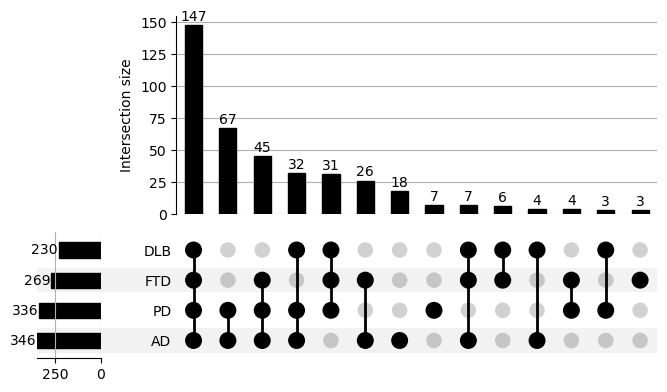

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

CSF_DAA_All = pd.read_excel("CSF_DAA_All_PAU_0205.xlsx")
Plasma_DAA_All = pd.read_excel("Plasma_DAA_All_0203.xlsx")

# with open("csf_selected_features_1000_0310.txt", "r") as f:
with open("csf_selected_features_400_0411.txt", "r") as f:
    csf_selected_features = [line.strip() for line in f]

# with open("plasma_selected_features_1800_0312.txt", "r") as f:
with open("plasma_selected_features_700_0411.txt", "r") as f:
    plasma_selected_features = [line.strip() for line in f]


##############################
# Part A: CSF Data
##############################
csf_filtered = CSF_DAA_All[CSF_DAA_All["Analytes"].isin(csf_selected_features)]
print("CSF data feature number:", csf_filtered.shape[0])

csf_filtered["AD_sig"]  = csf_filtered["AD_pvalue"]  < 0.05
csf_filtered["PD_sig"]  = csf_filtered["PD_pvalue"]  < 0.05
csf_filtered["FTD_sig"] = csf_filtered["FTD_pvalue"] < 0.05
csf_filtered["DLB_sig"] = csf_filtered["DLB_pvalue"] < 0.05

membership = []
for idx, row in csf_filtered.iterrows():
    sets_for_row = []
    if row["AD_sig"]:
        sets_for_row.append("AD")
    if row["PD_sig"]:
        sets_for_row.append("PD")
    if row["FTD_sig"]:
        sets_for_row.append("FTD")
    if row["DLB_sig"]:
        sets_for_row.append("DLB")
    membership.append(sets_for_row)

csf_membership = from_memberships(membership)

UpSet(csf_membership, sort_by='cardinality', subset_size="count", show_counts=True).plot()
# plt.title("CSF Selected Proteins Significance (p<0.05) UpSet Plot", weight='bold')
plt.show()

In [5]:
specific_PD_DLB = csf_filtered[
    (csf_filtered["PD_sig"]) & (csf_filtered["DLB_sig"]) &
    ~(csf_filtered["AD_sig"] | csf_filtered["FTD_sig"])
]

print("Specific PD and DLB protein number:", specific_PD_DLB.shape[0])

print(specific_PD_DLB["Analytes"].tolist())

Specific PD and DLB protein number: 3
['X8080.24', 'X6342.10', 'X3234.23']


In [6]:
specific_AD_FTD = csf_filtered[
    (csf_filtered["AD_sig"]) & (csf_filtered["FTD_sig"]) &
    ~(csf_filtered["PD_sig"] | csf_filtered["DLB_sig"])
]

print("Specific AD and FTD protein number:", specific_AD_FTD.shape[0])

print(specific_AD_FTD["Analytes"].tolist())

Specific AD and FTD protein number: 26
['X5939.42', 'X5019.16', 'X8231.122', 'X11365.17', 'X7060.2', 'X3481.87', 'X12831.21', 'X5620.13', 'X12812.25', 'X8033.1', 'X10562.42', 'X7952.2', 'X8102.239', 'X12880.1', 'X10948.14', 'X7186.111', 'X9173.21', 'X10613.33', 'X9719.145', 'X8353.15', 'X4991.12', 'X9061.3', 'X10903.50', 'X12721.4', 'X12018.84', 'X7748.11']


In [7]:
specific_AD_PD = csf_filtered[
    (csf_filtered["AD_sig"]) & (csf_filtered["PD_sig"]) &
    ~(csf_filtered["FTD_sig"] | csf_filtered["DLB_sig"])
]

print("Specific AD and PD protein number:", specific_AD_PD.shape[0])

print(specific_AD_PD["Analytes"].tolist())

Specific AD and PD protein number: 67
['X9964.10', 'X12677.164', 'X2913.1', 'X6378.2', 'X9451.20', 'X12477.42', 'X7898.29', 'X8954.30', 'X9883.29', 'X13240.170', 'X13574.50', 'X12786.61', 'X4959.2', 'X12661.44', 'X4276.10', 'X13113.7', 'X11659.31', 'X11557.3', 'X8070.88', 'X4250.23', 'X12479.50', 'X2742.68', 'X11926.23', 'X11626.7', 'X12381.26', 'X8394.56', 'X6649.51', 'X9757.29', 'X10785.8', 'X10085.25', 'X5134.52', 'X4280.47', 'X3365.7', 'X13963.7', 'X11649.3', 'X3034.1', 'X11354.21', 'X8963.8', 'X3897.61', 'X10835.25', 'X11161.5', 'X12460.18', 'X13097.11', 'X12494.99', 'X4968.50', 'X10737.96', 'X4306.4', 'X14273.19', 'X11279.42', 'X8289.8', 'X13062.4', 'X3825.18', 'X8274.64', 'X13522.20', 'X9995.6', 'X5020.50', 'X11494.4', 'X11262.39', 'X13615.60', 'X9053.16', 'X11241.8', 'X7084.1', 'X7758.217', 'X10001.7', 'X12993.21', 'X12399.194', 'X13242.134']


In [8]:
# AD Specific
specific_AD = csf_filtered[
    (csf_filtered["AD_sig"]) &
    ~(csf_filtered["PD_sig"] | csf_filtered["FTD_sig"] | csf_filtered["DLB_sig"])
]

# PD Specific
specific_PD = csf_filtered[
    (csf_filtered["PD_sig"]) &
    ~(csf_filtered["AD_sig"] | csf_filtered["FTD_sig"] | csf_filtered["DLB_sig"])
]

# FTD Specific
specific_FTD = csf_filtered[
    (csf_filtered["FTD_sig"]) &
    ~(csf_filtered["AD_sig"] | csf_filtered["PD_sig"] | csf_filtered["DLB_sig"])
]

# DLB Specific
specific_DLB = csf_filtered[
    (csf_filtered["DLB_sig"]) &
    ~(csf_filtered["AD_sig"] | csf_filtered["PD_sig"] | csf_filtered["FTD_sig"])
]


print("Number of AD specific:", specific_AD.shape[0])
print("AD specific protein:")
print(specific_AD["Analytes"].tolist())


print("Number of PD specific:", specific_PD.shape[0])
print("PD specific protein:")
print(specific_PD["Analytes"].tolist())

print("Number of FTD specific:", specific_FTD.shape[0])
print("FTD specific protein:")
print(specific_FTD["Analytes"].tolist())

print("Number of DLB specific:", specific_DLB.shape[0])
print("DLB specific protein:")
print(specific_DLB["Analytes"].tolist())


Number of AD specific: 18
AD specific protein:
['X13491.40', 'X3435.53', 'X7144.234', 'X8249.124', 'X6938.21', 'X10339.48', 'X9182.3', 'X8006.12', 'X6321.65', 'X9361.7', 'X12667.2', 'X12432.23', 'X3434.34', 'X4905.63', 'X4719.58', 'X8221.19', 'X9180.6', 'X10924.258']
Number of PD specific: 7
PD specific protein:
['X9805.51', 'X3421.54', 'X3083.71', 'X14054.17', 'X7211.2', 'X3623.84', 'X2436.49']
Number of FTD specific: 3
FTD specific protein:
['X9265.10', 'X2950.57', 'X8018.43']
Number of DLB specific: 0
DLB specific protein:
[]


In [9]:
# all
all_diseases = csf_filtered[
    (csf_filtered["AD_sig"]) & (csf_filtered["PD_sig"] & csf_filtered["FTD_sig"] & csf_filtered["DLB_sig"])
]

print("Number of all nominal:", all_diseases.shape[0])
print("All nominal protein:")
print(all_diseases["Analytes"].tolist())

Number of all nominal: 147
All nominal protein:
['X11368.32', 'X11681.8', 'X11454.87', 'X3853.56', 'X6518.85', 'X11664.32', 'X12469.19', 'X7761.125', 'X13943.38', 'X14083.25', 'X8479.4', 'X12853.112', 'X2864.2', 'X9877.28', 'X7788.1', 'X6284.7', 'X9900.36', 'X13434.172', 'X5475.10', 'X5464.52', 'X12517.52', 'X13482.14', 'X11211.7', 'X5885.55', 'X4179.57', 'X14151.4', 'X9826.135', 'X12945.33', 'X11330.15', 'X14324.52', 'X3466.8', 'X12861.13', 'X11476.43', 'X13939.14', 'X9388.18', 'X9459.7', 'X11356.19', 'X5980.55', 'X5717.2', 'X13545.97', 'X5110.84', 'X3397.7', 'X4911.49', 'X4192.10', 'X14146.92', 'X9764.79', 'X4992.49', 'X3905.62', 'X9531.24', 'X14157.21', 'X14326.4', 'X11431.235', 'X12499.108', 'X8946.38', 'X9266.1', 'X6521.35', 'X9934.29', 'X2514.65', 'X14037.18', 'X7738.299', 'X5476.66', 'X3392.68', 'X9742.59', 'X3872.2', 'X13959.7', 'X5715.4', 'X5467.15', 'X6304.8', 'X9126.171', 'X11546.7', 'X13384.110', 'X10082.251', 'X10749.18', 'X5609.92', 'X9831.12', 'X12478.15', 'X5903.91', 'X

In [13]:
# Get global min/max of effect size for color scale normalization
effect_min = heatmap_data.min().min()
effect_max = heatmap_data.max().max()
print(f"effect_min: {effect_min}")
print(f"effect_max: {effect_max}")

effect_min: -0.997066540250571
effect_max: 0.914898477730563


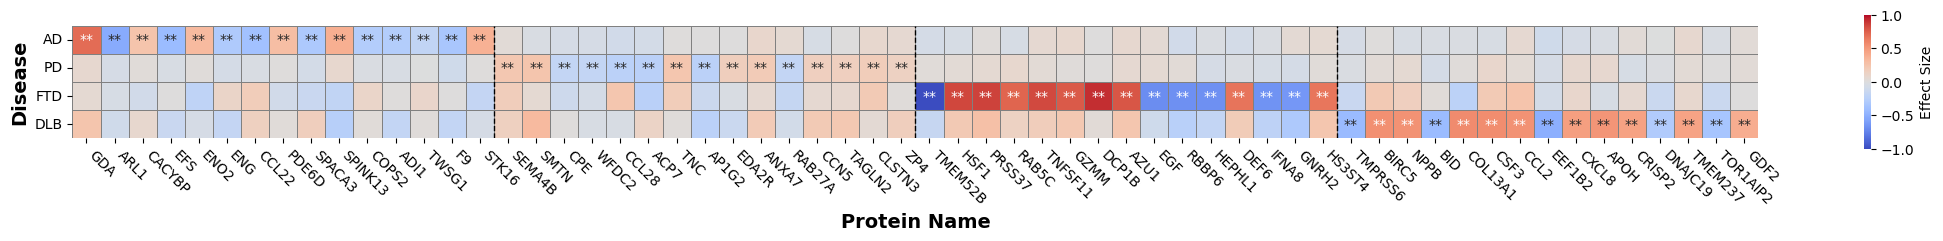

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Parameter settings
diseases = ['AD', 'PD', 'FTD', 'DLB']
p_value_threshold = 0.05
fdr_threshold = 0.05
top_n = 15  # Number of top disease-specific analytes per disease

# 2. Create mapping from analyte ID to EntrezGeneSymbol
symbol_map = CSF_DAA_All[['Analytes', 'EntrezGeneSymbol']].dropna().drop_duplicates()
analyte_to_symbol = dict(zip(symbol_map['Analytes'], symbol_map['EntrezGeneSymbol']))

# 3. Strict disease-specific analyte selection based on p-value
#    For each disease: keep analytes with p < 0.05 ONLY in that disease
disease_to_analytes = {}

for disease in diseases:
    p_col = f'{disease}_pvalue'

    disease_specific_analytes = []
    for _, row in CSF_DAA_All.iterrows():
        analyte = row['Analytes']
        p_val = row[p_col]

        if pd.notna(p_val) and p_val < p_value_threshold:
            is_specific = True
            for other_disease in diseases:
                if other_disease == disease:
                    continue
                other_p = row[f'{other_disease}_pvalue']
                if pd.notna(other_p) and other_p < p_value_threshold:
                    is_specific = False
                    break
            if is_specific:
                disease_specific_analytes.append((analyte, p_val))

    # Sort by smallest p-value and select top N
    sorted_analytes = sorted(disease_specific_analytes, key=lambda x: x[1])[:top_n]
    disease_to_analytes[disease] = [x[0] for x in sorted_analytes]

# 4. Generate ordered analyte labels (Analyte_EntrezGeneSymbol)
#    Track block boundaries for vertical separators in the heatmap
ordered_analytes = []
symbol_origin_breaks = []

for disease in diseases:
    analytes = disease_to_analytes[disease]
    analyte_labels = [
        f"{a}_{analyte_to_symbol[a]}" if a in analyte_to_symbol else a
        for a in analytes
    ]
    ordered_analytes.extend(analyte_labels)
    symbol_origin_breaks.append(len(ordered_analytes))

# 5. Filter the dataset and index by analyte_label
analyte_names = [label.split('_')[0] for label in ordered_analytes]
filtered_df = CSF_DAA_All[CSF_DAA_All['Analytes'].isin(analyte_names)].copy()
filtered_df['analyte_label'] = filtered_df['Analytes'].map(
    lambda a: f"{a}_{analyte_to_symbol[a]}" if a in analyte_to_symbol else a
)
filtered_df.set_index('analyte_label', inplace=True)

# 6. Build heatmap matrix and significance annotation matrix
heatmap_data = pd.DataFrame(index=ordered_analytes, columns=diseases)
significance_data = pd.DataFrame(index=ordered_analytes, columns=diseases)

for disease in diseases:
    p_col = f'{disease}_pvalue'
    fdr_col = f'{disease}_FDR'
    effect_col = f'{disease}_Estimate'

    for analyte_label in ordered_analytes:
        if analyte_label not in filtered_df.index:
            continue
        
        row = filtered_df.loc[[analyte_label]]
        p_value = row[p_col].values[0]
        fdr_value = row[fdr_col].values[0]
        effect_size = row[effect_col].values[0]

        heatmap_data.loc[analyte_label, disease] = effect_size

        # Annotate with ** if FDR < 0.05, * if p < 0.05
        if pd.notna(fdr_value) and fdr_value < fdr_threshold:
            significance_data.loc[analyte_label, disease] = '**'
        elif pd.notna(p_value) and p_value < p_value_threshold:
            significance_data.loc[analyte_label, disease] = '*'
        else:
            significance_data.loc[analyte_label, disease] = ''

# 7. Plot heatmap
plt.figure(figsize=(22, 7))
cmap = sns.diverging_palette(240, 10, as_cmap=True)

ax = sns.heatmap(
    heatmap_data.T.astype(float),
    annot=significance_data.T,
    fmt='',
    cmap='coolwarm',
    center=0,
    vmin=-1.0,
    vmax=1.0,
    linewidths=.5,
    linecolor='gray',
    cbar_kws={'label': 'Effect Size', 'shrink': 0.2},
    square=True
)

# Customize axis labels
plt.xlabel('Protein Name', fontsize=14, weight='bold')
plt.ylabel('Disease', fontsize=14, weight='bold')

# Replace x-tick labels with EntrezGeneSymbols
entrez_labels = [label.split('_')[-1] for label in ordered_analytes]
ax.set_xticklabels(entrez_labels, rotation=-45, ha='left')

# Draw vertical lines to separate disease blocks
for pos in symbol_origin_breaks[:-1]:
    ax.axvline(pos, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
# plt.savefig('Strict_Pvalue_Disease_Specific_Top60_Heatmap.png', dpi=300)
plt.show()
